1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_recall_curve, roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split

 2. Load and Prepare Da

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
feature_names = X.columns.tolist()

3. Train-Test Split and Standardization

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Model Training

*   First, import the LogisticRegression module and create a logistic regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().



In [4]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42, solver='liblinear')

5. Evaluation

In [5]:
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

Confusion Matrix

* A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.  



In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[41  2]
 [ 1 70]]


Classification Report

In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



ROC-AUC

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc_score:.4f}")

ROC-AUC Score: 0.9974


6. Threshold Tuning and Visualization-
   Precision-Recall Curve


In [9]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)


Find threshold for 95% recall

In [10]:
target_recall = 0.95
idx = np.argmax(recalls >= target_recall)
custom_threshold = thresholds[idx]

In [11]:
print(f"\nThreshold for {target_recall:.0%} recall: {custom_threshold:.4f}")
print(f"Precision at this threshold: {precisions[idx]:.2%}")


Threshold for 95% recall: 0.0000
Precision at this threshold: 62.28%


Sigmoid Function Explanation

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


Generate sample values

In [13]:
z = np.linspace(-5, 5, 100)
s = sigmoid(z)

Plotting

In [14]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Sigmoid Plot

Text(0, 0.5, 'Probability')

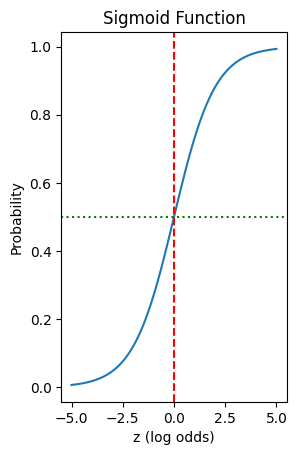

In [15]:
plt.subplot(1, 2, 1)
plt.plot(z, s)
plt.axvline(0, color='r', linestyle='--')
plt.axhline(0.5, color='g', linestyle=':')
plt.title("Sigmoid Function")
plt.xlabel("z (log odds)")
plt.ylabel("Probability")

ROC Curve

*   Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.








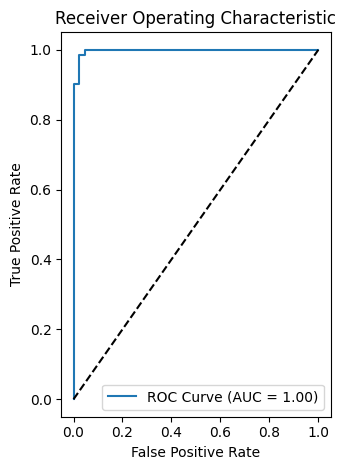

In [16]:
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

7. Using Custom Threshold

In [17]:
custom_preds = (y_probs >= custom_threshold).astype(int)
print("\nCustom Threshold Performance:")
print(classification_report(y_test, custom_preds))



Custom Threshold Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
